In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
liver=pd.read_csv('/content/drive/MyDrive/12 semester /AI Project/Liver Patient Dataset (LPD)_train.csv', encoding= 'unicode_escape')

In [ ]:
liver.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [ ]:
liver.columns = ['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Dataset']

In [ ]:
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [ ]:
liver.shape

(30691, 11)

In [ ]:
x= liver['Dataset'].value_counts()


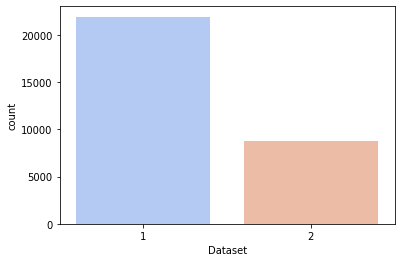

In [ ]:
sns.countplot(x='Dataset',data=liver,palette='coolwarm')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


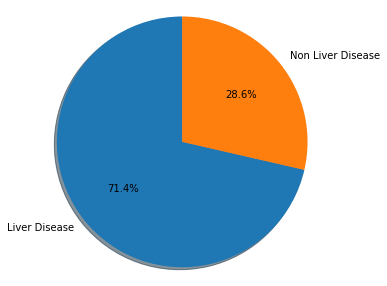

In [ ]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Liver Disease', 'Non Liver Disease'

# Sizes for each slide
sizes = [x] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

# **Histogram**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4666e0acd0>,
      dtype=object)

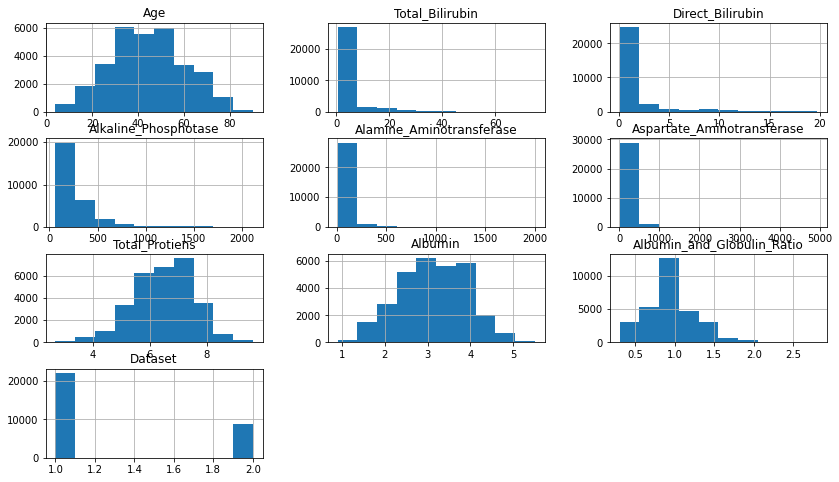

In [ ]:
liver.hist(figsize=(14,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46668ffa10>,
      dtype=object)

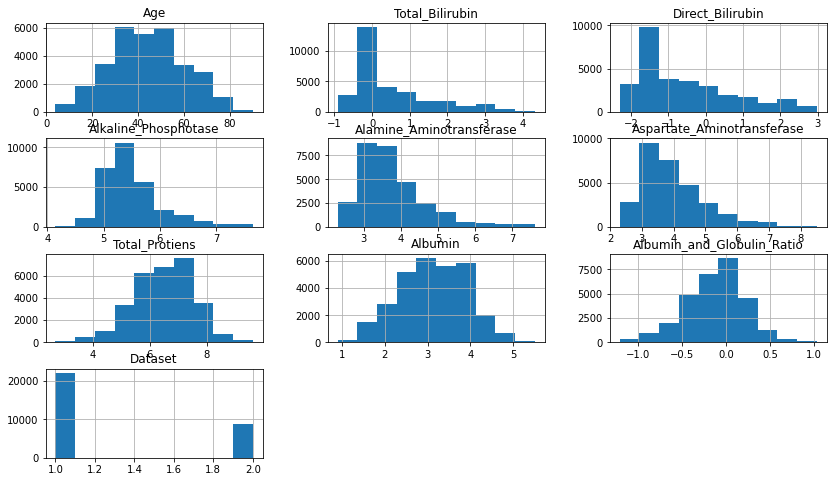

In [ ]:
skewed = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Albumin_and_Globulin_Ratio']

liver_data_features_log_transformed = pd.DataFrame(data = liver)
liver_data_features_log_transformed[skewed] = liver[skewed].apply(lambda x: np.log(x))

liver_data_features_log_transformed.hist(figsize=(14,8))

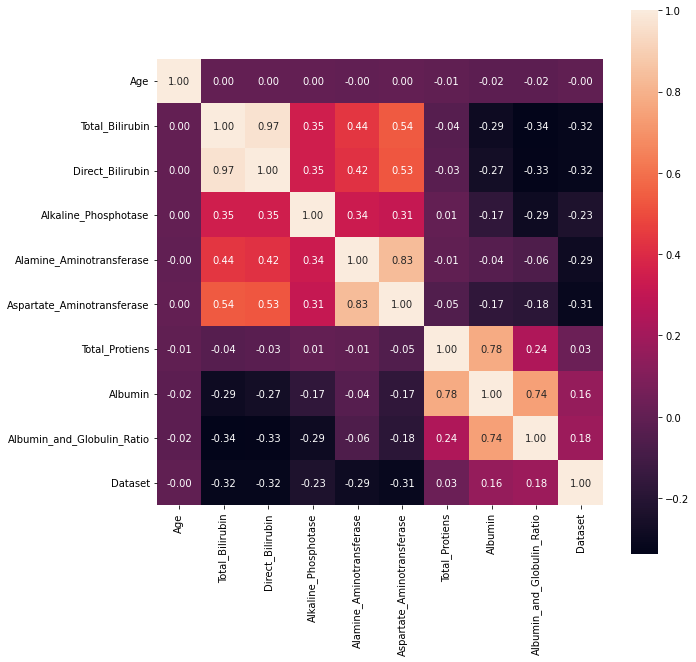

In [ ]:
# calculate correlation coefficients for the dataset
correlations = liver.corr()

# and visualize
plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})

In [ ]:
liver_diseased=liver[liver['Dataset']==1]
liver_diseased

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65.0,Female,-0.356675,-2.302585,5.231109,2.772589,2.890372,6.8,3.3,-0.105361,1
1,62.0,Male,2.388763,1.704748,6.549651,4.158883,4.605170,7.5,3.2,-0.301105,1
2,62.0,Male,1.987874,1.410987,6.194405,4.094345,4.219508,7.0,3.3,-0.116534,1
3,58.0,Male,0.000000,-0.916291,5.204007,2.639057,2.995732,6.8,3.4,0.000000,1
4,72.0,Male,1.360977,0.693147,5.273000,3.295837,4.077537,7.3,2.4,-0.916291,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,0.788457,0.000000,6.413459,2.833213,3.332205,7.3,2.6,-0.597837,1
30687,55.0,Male,1.064711,0.262364,6.177944,3.091042,3.526361,7.0,2.4,-0.693147,1
30688,54.0,Male,1.916923,1.098612,6.295266,4.753590,4.189655,6.4,3.1,-0.105361,1
30689,48.0,Female,0.641854,0.000000,5.442418,2.772589,4.007333,4.3,1.6,-0.510826,1


In [ ]:
liver_diseased.shape

(21917, 11)

In [ ]:
liver_diseased.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,21915.000000,21483.000000,21536.000000,21354.000000,21560.000000,21590.000000,21586.000000,21561.000000,21547.000000,21917.0
mean,44.155327,0.683327,-0.360120,5.568249,3.926014,4.171656,6.459446,3.049743,-0.156750,1.0
std,15.992633,1.110345,1.419134,0.553906,0.963910,1.062718,1.088385,0.782546,0.362335,0.0
min,4.000000,-0.916291,-2.302585,4.143135,2.484907,2.397895,2.700000,0.900000,-1.203973,1.0
25%,32.000000,-0.223144,-1.609438,5.225747,3.218876,3.401197,5.700000,2.500000,-0.356675,1.0
50%,45.000000,0.336472,-0.693147,5.438079,3.713572,3.988984,6.600000,3.000000,-0.105361,1.0
75%,55.000000,1.308333,0.641854,5.752573,4.369448,4.727388,7.200000,3.600000,0.095310,1.0
max,90.000000,4.317488,2.980619,7.654443,7.600902,8.502891,9.600000,5.500000,1.029619,1.0


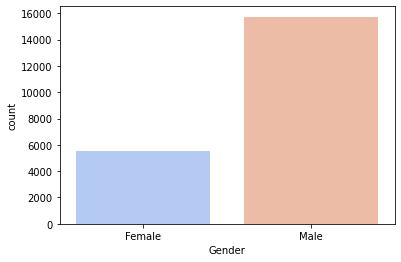

In [ ]:
sns.countplot(x='Gender',data=liver_diseased,palette='coolwarm')

In [ ]:
for i in range(30691):
    if liver.iloc[i,10]==2:
        liver.iloc[i,10]=0

In [ ]:
liver['Dataset'].value_counts()

1    21917
0     8774
Name: Dataset, dtype: int64

In [ ]:
for i in range(30691):
    if liver.iloc[i,1]=='Male':
        liver.iloc[i,1]=0
    else:
        liver.iloc[i,1]=1

In [ ]:
liver['Gender'].value_counts()

0    21986
1     8705
Name: Gender, dtype: int64

In [ ]:
for i in range(11):
    print(sum(liver.iloc[:,i].isnull()))   

2
0
648
561
796
538
462
463
494
559
0


In [ ]:
liver['Age'].fillna(liver['Age'].mean(),inplace=True)
liver['Total_Bilirubin'].fillna(liver['Total_Bilirubin'].mean(),inplace=True)
liver['Direct_Bilirubin'].fillna(liver['Direct_Bilirubin'].mean(),inplace=True)
liver['Alkaline_Phosphotase'].fillna(liver['Alkaline_Phosphotase'].mean(),inplace=True)
liver['Alamine_Aminotransferase'].fillna(liver['Alamine_Aminotransferase'].mean(),inplace=True)
liver['Aspartate_Aminotransferase'].fillna(liver['Aspartate_Aminotransferase'].mean(),inplace=True)
liver['Total_Protiens'].fillna(liver['Total_Protiens'].mean(),inplace=True)
liver['Albumin'].fillna(liver['Albumin'].mean(),inplace=True)
liver['Albumin_and_Globulin_Ratio'].fillna(liver['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [ ]:
for i in range(11):
    print(sum(liver.iloc[:,i].isnull()))   

0
0
0
0
0
0
0
0
0
0
0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(liver.drop('Dataset',axis=1))
scaled_features = scaler.transform(liver.drop('Dataset',axis=1))
liver_scaled = pd.DataFrame(scaled_features,columns=liver.columns[:-1])
liver_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.307413,1.589237,-0.820185,-1.262364,-0.503373,-1.101309,-1.090046,0.297795,0.216141,0.032825
1,1.119681,-0.629233,1.878940,1.764071,2.045784,0.444597,0.630708,0.949703,0.088893,-0.532987
2,1.119681,-0.629233,1.484814,1.542215,1.358983,0.372628,0.243706,0.484054,0.216141,0.000528
3,0.869372,-0.629233,-0.469527,-0.215401,-0.555770,-1.250214,-0.984319,0.297795,0.343389,0.337377
4,1.745453,-0.629233,0.868492,1.000085,-0.422385,-0.517816,0.101243,0.763444,-0.929092,-2.311222


In [ ]:
X=liver_scaled
y=liver['Dataset']

# **Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
y_test.value_counts()

1    6492
0    2716
Name: Dataset, dtype: int64

# **Suport Vector Machine(SVM)**

In [ ]:
from sklearn.svm import SVC
model=SVC()
param_grid = {'C': [0.1,1, 10,50,100,200,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)
svm_predictions=grid.predict(X_test)
svm_acc=accuracy_score(y_test,svm_predictions)
svm_prec=precision_score(y_test,svm_predictions)
svm_rec=recall_score(y_test,svm_predictions)
svm_f1=f1_score(y_test,svm_predictions)
svm_mas=mean_absolute_error(y_test,svm_predictions)
svm_rms=np.sqrt(mean_squared_error(y_test,svm_predictions))

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.796 total time=  18.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.807 total time=  18.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.808 total time=  18.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=  18.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.806 total time=  18.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.723 total time=  15.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.723 total time=  15.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.728 total time=  16.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.723 total time=  16.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.726 total time=  15.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=  16.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
print(classification_report(y_test,svm_predictions))

In [ ]:
sns.heatmap(confusion_matrix(y_test,svm_predictions,normalize='true'),annot=True)
plt.title(' SVM')

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,svm_predictions)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

In [ ]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic (SVM)')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
lg_predictions=lg.predict(X_test)
lg_acc=accuracy_score(y_test,lg_predictions)
lg_prec=precision_score(y_test,lg_predictions)
lg_rec=recall_score(y_test,lg_predictions)
lg_f1=f1_score(y_test,lg_predictions)
lg_mas=mean_absolute_error(y_test,lg_predictions)
lg_rms=np.sqrt(mean_squared_error(y_test,lg_predictions))


In [ ]:
print(classification_report(y_test,lg_predictions))

In [ ]:
sns.heatmap(confusion_matrix(y_test,lg_predictions,normalize='true'),annot=True)
plt.title('Logistic Regression')

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test,lg_predictions)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

In [ ]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic (Logistic Regression)')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
rfc_predictions=rfc.predict(X_test)
rfc_acc=accuracy_score(y_test,rfc_predictions)
rfc_prec=precision_score(y_test,rfc_predictions)
rfc_rec=recall_score(y_test,rfc_predictions)
rfc_f1=f1_score(y_test,rfc_predictions)
rfc_mas=mean_absolute_error(y_test,rfc_predictions)
rfc_rms=np.sqrt(mean_squared_error(y_test,rfc_predictions))

In [ ]:
print(classification_report(y_test,rfc_predictions))

In [ ]:
sns.heatmap(confusion_matrix(y_test,rfc_predictions,normalize='true'),annot=True)
plt.title('Random Forest')

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,rfc_predictions)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

In [ ]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic (Random Forest)')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_predictions=dtree.predict(X_test)
dtree_acc=accuracy_score(y_test,dtree_predictions)
dtree_prec=precision_score(y_test,dtree_predictions)
dtree_rec=recall_score(y_test,dtree_predictions)
dtree_f1=f1_score(y_test,dtree_predictions)
dtree_mas=mean_absolute_error(y_test,dtree_predictions)
dtree_rms=np.sqrt(mean_squared_error(y_test,dtree_predictions))

In [ ]:
print(classification_report(y_test,dtree_predictions))

In [ ]:
sns.heatmap(confusion_matrix(y_test,dtree_predictions,normalize='true'),annot=True)
plt.title('Decision Tree')

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,dtree_predictions)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

In [ ]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic (Decision Tree)')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')                                                                                                                                                                         
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **K-Nearest Neighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=36)

knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)
knn_acc=accuracy_score(y_test,knn_predictions)
knn_prec=precision_score(y_test,knn_predictions)
knn_rec=recall_score(y_test,knn_predictions)
knn_f1=f1_score(y_test,knn_predictions)
knn_mas=mean_absolute_error(y_test,knn_predictions)
knn_rms=np.sqrt(mean_squared_error(y_test,knn_predictions))

print(classification_report(y_test,knn_predictions))

In [ ]:
sns.heatmap(confusion_matrix(y_test,knn_predictions,normalize='true'),annot=True)
plt.title('K-Nearest Neighbors')

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,knn_predictions)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

In [ ]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic (K-Nearest Neighbors)')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Result**

In [ ]:
d={'Machine Learning Algorithm':['Support Vector Machine','Logistic Regression','Random Forest Classifier','Decision Tree Classifier','K Nearest Neighbours'],'Accuracy_Score':[svm_acc*100,lg_acc*100,rfc_acc*100,dtree_acc*100,knn_acc*100],'Precision_Score':[svm_prec*100,lg_prec*100,rfc_prec*100,dtree_prec*100,knn_prec*100],'Recall_Score':[svm_rec*100,lg_rec*100,rfc_rec*100,dtree_rec*100,knn_rec*100],'F1_Score':[svm_f1*100,lg_f1*100,rfc_f1*100,dtree_f1*100,knn_f1*100],'Mean_Absolute_Error':[svm_mas*100,lg_mas*100,rfc_mas*100,dtree_mas*100,knn_mas*100],'Root_Mean_Square_Error':[svm_rms*100,lg_rms*100,rfc_rms*100,dtree_rms*100,knn_rms*100]}
results=pd.DataFrame(d)
results

In [ ]:
results.plot.bar(x='Machine Learning Algorithm',figsize=(14,7))
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))